In [1]:
# Importing the required packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import warnings
warnings.filterwarnings('ignore')

# Bar Graph UDF

In [2]:
def generate_bar_graph(connection_string, table_name, x_column, y_column):
    """
    Generates a bar graph from specified database table columns.
    Parameters:
    connection_string (str): The connection string for the database.
    table_name (str): The name of the table to query.
    x_column (str): The column name for the X axis.
    y_column (str): The column name for the Y axis.
    """
    # Connect to the database
    conn = pyodbc.connect(connection_string)    
    try:
        # Query the specified columns from the table
        query = f"SELECT {x_column}, {y_column} FROM {table_name}"
        df = pd.read_sql(query, conn)        
        # Check if dataframe is empty
        if df.empty:
            print("No data found for the specified columns.")
            return        
        # Plotting the bar graph
        plt.figure(figsize=(10, 6))
        plt.bar(df[x_column], df[y_column], color='blue')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(f'Bar Graph of {x_column} vs {y_column}')
        plt.xticks(rotation=90)
        plt.tight_layout()        
        # Display the graph
        plt.show()
    finally:
        # Close the connection
        conn.close()

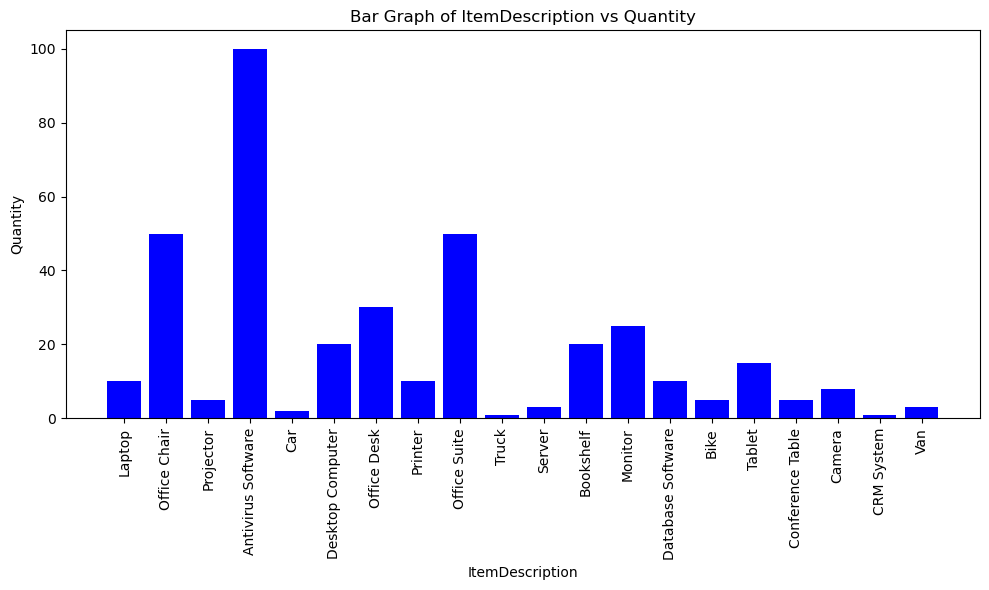

In [3]:
# Calling the user defined function with the required parameters
connection_string = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=192.168.0.100;DATABASE=AST_MNG;UID=sa;PWD=scs@123'
table_name = 'Quotation'
x_column = 'ItemDescription'
y_column = 'Quantity'

generate_bar_graph(connection_string, table_name, x_column, y_column)

# Pie Chart UDF

In [4]:
# Non aggregated Pie Chart Code
def generate_pie_chart(connection_string, table_name, x_column, y_column):
    """
    Generates a pie chart from specified database table columns.
    Parameters:
    connection_string (str): The connection string for the database.
    table_name (str): The name of the table to query.
    x_column (str): The column name for the labels.
    y_column (str): The column name for the values.
    """
    # Connect to the database
    conn = pyodbc.connect(connection_string)    
    try:
        # Query the specified columns from the table
        query = f"SELECT {x_column}, {y_column} FROM {table_name}"
        df = pd.read_sql(query, conn)        
        # Check if dataframe is empty
        if df.empty:
            print("No data found for the specified columns.")
            return        
        # Plotting the pie chart
        plt.figure(figsize=(10, 6))
        plt.pie(df[y_column], labels=df[x_column], autopct='%1.1f%%', startangle=140)
        plt.title(f'Non Aggregated Pie Chart of {x_column} vs {y_column}\n')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.        
        # Display the chart
        plt.show()
    finally:
        # Close the connection
        conn.close()

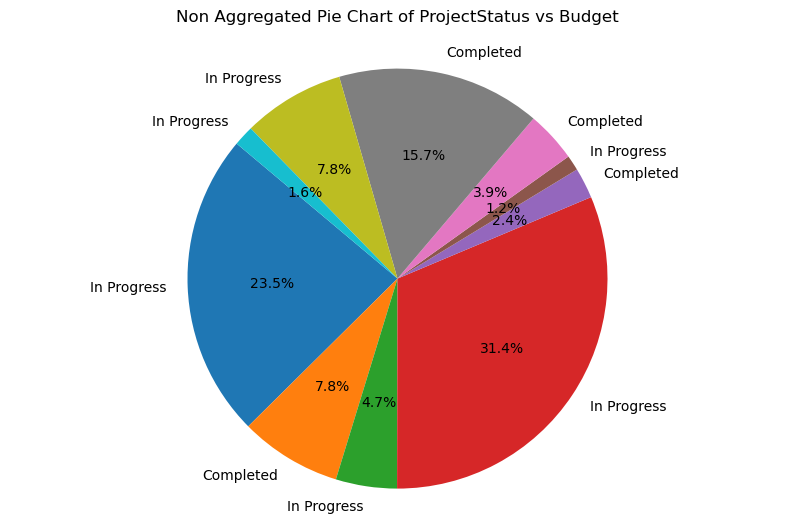

In [5]:
# Calling the user defined function with the required parameters
connection_string = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=192.168.0.100;DATABASE=AST_MNG;UID=sa;PWD=scs@123'
table_name = 'Projects'
x_column = 'ProjectStatus'
y_column = 'Budget'

generate_pie_chart(connection_string, table_name, x_column, y_column)

In [6]:
# Aggregated Pie Chart Code
def generate_pie_chart_agg(connection_string, table_name, x_column, y_column):
    """
    Generates a pie chart from specified database table columns.

    Parameters:
    connection_string (str): The connection string for the database.
    table_name (str): The name of the table to query.
    x_column (str): The column name for the labels.
    y_column (str): The column name for the values.
    """
    # Connect to the database
    conn = pyodbc.connect(connection_string)    
    try:
        # Query the specified columns from the table
        query = f"SELECT {x_column}, {y_column} FROM {table_name}"
        df = pd.read_sql(query, conn)        
        # Check if dataframe is empty
        if df.empty:
            print("No data found for the specified columns.")
            return        
        # Aggregate the data by the x_column
        aggregated_df = df.groupby(x_column).sum().reset_index()        
        # Plotting the pie chart
        plt.figure(figsize=(10, 6))
        plt.pie(aggregated_df[y_column], labels=aggregated_df[x_column], autopct='%1.1f%%', startangle=140)
        plt.title(f'Aggregated Pie Chart of {x_column} vs {y_column}')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.        
        # Display the chart
        plt.show()
    finally:
        # Close the connection
        conn.close()

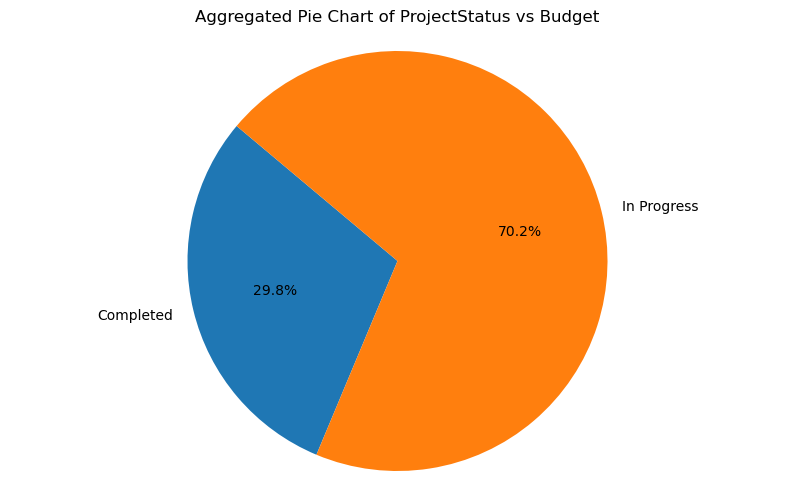

In [7]:
generate_pie_chart_agg(connection_string, table_name, x_column, y_column)